# Cleaning US Census Data

## Inspect the Data!

1. The datasets contain population of states and their ethnicities 

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 
states =glob.glob('states*.csv')
df_list = []
for state in states:
    info = pd.read_csv(state)
    df_list.append(info)
us_census = pd.concat(df_list)

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [2]:
print(us_census.columns)
print(us_census.dtypes)


Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [3]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [4]:
us_census['Income'] = us_census['Income'].str.replace('[\$,]','',regex = True)
us_census['Income'] = pd.to_numeric(us_census['Income'])
us_census['Income']

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
Name: Income, dtype: float64

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [5]:
split_df = us_census['GenderPop'].str.split('_', expand = True)

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [6]:
us_census['Men'] = split_df[0].str.replace('M', '')
us_census['Women'] = split_df[1].str.replace('F', '')
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0
0,0,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0
1,1,Vermont,626604,1.61%,93.98%,0.98%,0.30%,1.24%,0.03%,55602.97,308573M_318031F,308573,318031.0
2,2,Virginia,8256630,8.01%,63.27%,20.18%,0.21%,5.46%,0.06%,72866.01,4060948M_4195682F,4060948,4195682.0
3,3,Washington,6985464,11.14%,72.04%,3.38%,1.41%,7.02%,0.61%,64493.77,3487725M_3497739F,3487725,3497739.0


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

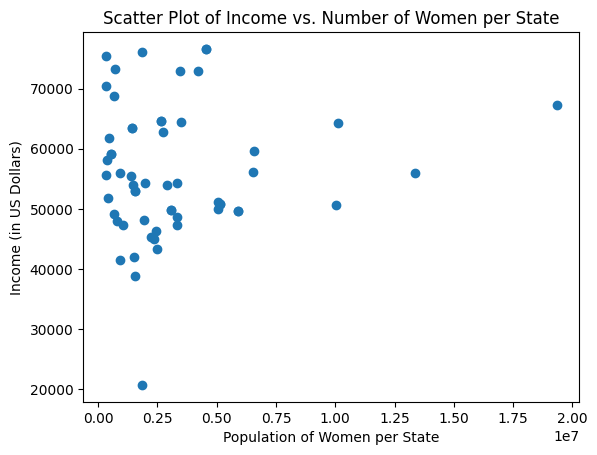

<Figure size 640x480 with 0 Axes>

In [7]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [8]:
us_census = us_census.fillna(value = {'Women':us_census['TotalPop'] - us_census['Men']})

us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0
0,0,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0
1,1,Vermont,626604,1.61%,93.98%,0.98%,0.30%,1.24%,0.03%,55602.97,308573M_318031F,308573,318031.0
2,2,Virginia,8256630,8.01%,63.27%,20.18%,0.21%,5.46%,0.06%,72866.01,4060948M_4195682F,4060948,4195682.0
3,3,Washington,6985464,11.14%,72.04%,3.38%,1.41%,7.02%,0.61%,64493.77,3487725M_3497739F,3487725,3497739.0


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [9]:
us_census.duplicated(subset = us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

11. Drop those duplicates using the `.drop_duplicates()` function.

In [10]:
us_census.drop_duplicates(subset = us_census.columns[1:])

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0
1,1,Vermont,626604,1.61%,93.98%,0.98%,0.30%,1.24%,0.03%,55602.97,308573M_318031F,308573,318031.0
2,2,Virginia,8256630,8.01%,63.27%,20.18%,0.21%,5.46%,0.06%,72866.01,4060948M_4195682F,4060948,4195682.0
3,3,Washington,6985464,11.14%,72.04%,3.38%,1.41%,7.02%,0.61%,64493.77,3487725M_3497739F,3487725,3497739.0
4,4,West Virginia,1851420,1.29%,92.18%,3.66%,0.15%,0.68%,0.03%,41437.11,913631M_937789F,913631,937789.0


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

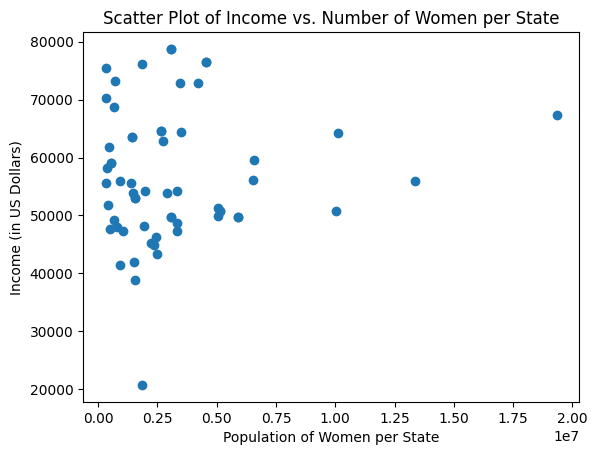

<Figure size 640x480 with 0 Axes>

In [11]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

## Histogram of Races

13. Lets Look at the `.columns` again to see what the race categories are.

In [12]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

14. To make the histogram for each 

    we will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [13]:
us_census['Hispanic'] = us_census['Hispanic'].str.replace('[\%,]','',regex = True)
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])
us_census['White'] = us_census['White'].str.replace('[\%,]','',regex = True)
us_census['White'] = pd.to_numeric(us_census['White'])
us_census['Black'] = us_census['Black'].str.replace('[\%,]','',regex = True)
us_census['Black'] = pd.to_numeric(us_census['Black'])
us_census['Native'] = us_census['Native'].str.replace('[\%,]','',regex = True)
us_census['Native'] = pd.to_numeric(us_census['Native'])
us_census['Pacific'] = us_census['Pacific'].str.replace('[\%,]','',regex = True)
us_census['Pacific'] = pd.to_numeric(us_census['Pacific'])
us_census['Asian'] = us_census['Asian'].str.replace('[\%,]','',regex = True)
us_census['Asian'] = pd.to_numeric(us_census['Asian'])
us_censusb

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06,62.89,28.75,0.29,1.25,0.05,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24,82.50,1.42,9.42,1.02,0.04,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72,73.49,18.28,0.23,1.41,0.04,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05,44.69,11.65,0.26,3.67,0.07,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229M_1444150F,1459229,1444150.0
0,0,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229M_1444150F,1459229,1444150.0
1,1,Vermont,626604,1.61,93.98,0.98,0.30,1.24,0.03,55602.97,308573M_318031F,308573,318031.0
2,2,Virginia,8256630,8.01,63.27,20.18,0.21,5.46,0.06,72866.01,4060948M_4195682F,4060948,4195682.0
3,3,Washington,6985464,11.14,72.04,3.38,1.41,7.02,0.61,64493.77,3487725M_3497739F,3487725,3497739.0


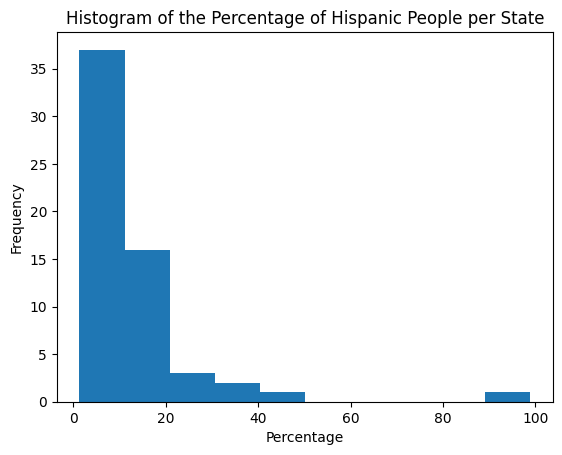

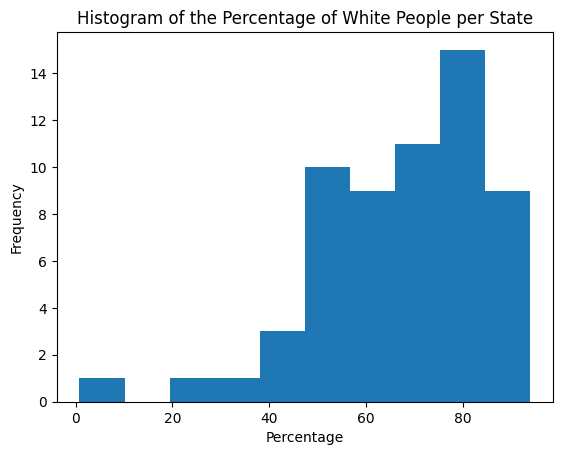

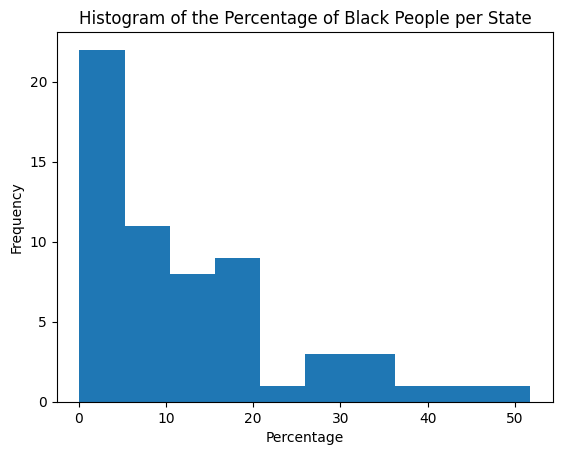

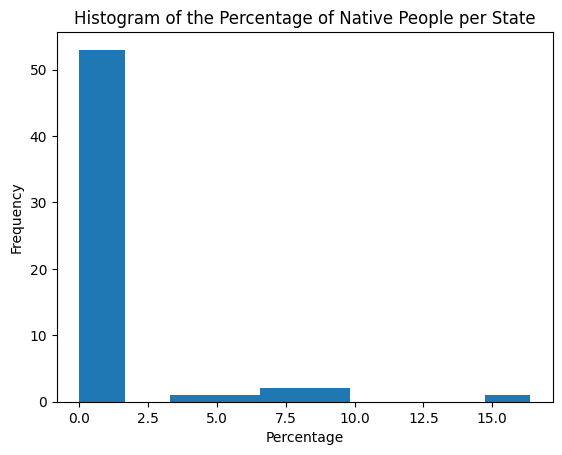

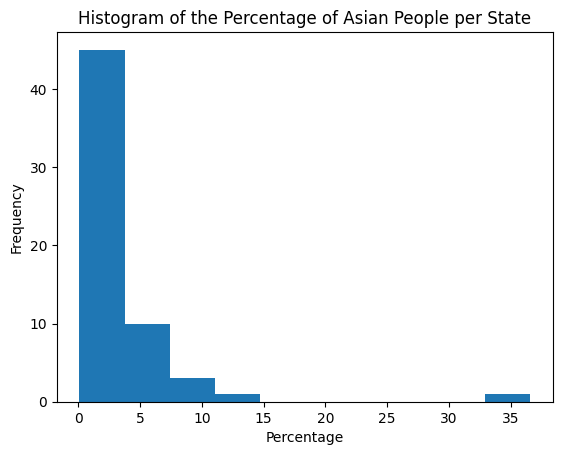

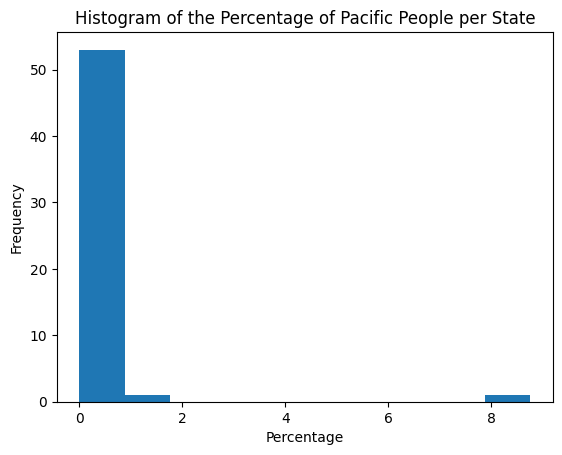

<Figure size 640x480 with 0 Axes>

In [19]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()